## 任务说明

- 学习主题：作者关联（数据建模任务），对论文作者关系进行建模，统计最常出现的作者关系；
- 学习内容：构建作者关系图，挖掘作者关系
- 学习成果：论文作者知识图谱、图关系挖掘

## 数据处理步骤

将作者列表进行处理，并完成统计。具体步骤如下：

- 将论文第一作者与其他作者（论文非第一作者）构建图；
- 使用图算法统计图中作者与其他作者的联系；

## 社交网络分析

图是复杂网络研究中的一个重要概念。Graph是用**点**和**线**来刻画离散事物集合中的每对事物间以某种方式相联系的数学模型。Graph在现实世界中随处可见，如交通运输图、旅游图、流程图等。利用图可以描述现实生活中的许多事物，如用点可以表示交叉口，点之间的连线表示路径，这样就可以轻而易举的描绘出一个交通运输网络。

### 图类型

- 无向图，忽略了两节点间边的方向。

- 指有向图，考虑了边的有向性。

- 多重无向图，即两个结点之间的边数多于一条，又允许顶点通过同一条边和自己关联。

### 图统计指标

- 度：是指和该节点相关联的边的条数，又称关联度。对于有向图，节点的入度 是指进入该节点的边的条数；节点的出度是指从该节点出发的边的条数；

- 迪杰斯特拉路径：.从一个源点到其它各点的最短路径，可使用迪杰斯特拉算法来求最短路径；

- 连通图：在一个无向图 G 中，若从顶点i到顶点j有路径相连，则称i和j是连通的。如果 G 是有向图，那么连接i和j的路径中所有的边都必须同向。如果图中任意两点都是连通的，那么图被称作连通图。如果此图是有向图，则称为强连通图。

对于其他图算法，可以在networkx和igraph两个库中找到。

## 具体代码以及讲解

首先读取我们想要的数据：

In [1]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [20]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', 
                     ['id', 'authors_parsed'],
                    200000)


创建作者链接的无向图：

In [43]:
import networkx as nx 
# 创建无向图
G = nx.Graph()

# 只用五篇论文进行构建
for row in data.iloc[:500].itertuples():
    authors = row[2]
    authors = [' '.join(x[:-1]) for x in authors]
    
    # 第一个作者 与 其他作者链接
    for author in authors[1:]:
        G.add_edge(authors[0],author) #　添加节点２，３并链接２３节点

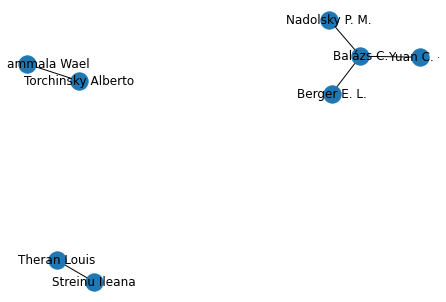

In [31]:
# 将作者关系图进行绘制：
nx.draw(G, with_labels=True)

In [36]:
try:
    print(nx.dijkstra_path(G, 'Balázs C.', 'Ziambaras Eleni'))
except:
    print('No path')

['Balázs C.', 'Nadolsky P. M.', 'Huston J.', 'The ATLAS Collaboration ', 'Ryan P.', 'Liu Jian', 'Gray Benjamin', 'Lee Ho Nyung', 'Rabe Karin M.', 'Cooper Valentino R.', 'Johnston Karen', 'Kleis Jesper', 'Ziambaras Eleni']


如果我们500片论文构建图，则可以得到更加完整作者关系，并选择最大联通子图进行绘制，折线图为子图节点度值。

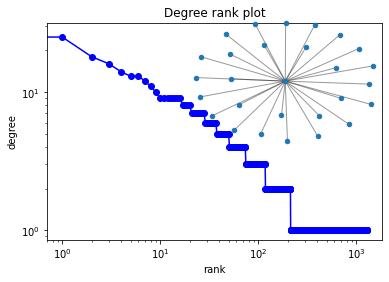

In [46]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)

plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

pos = nx.spring_layout(Gcc)
plt.axis("off")
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()